<a href="https://colab.research.google.com/github/Ruhit43/RL-Frozen-Lake/blob/main/RL_Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building a Reinforcement Learning System for Frozen Lake


In this Notebook, an agent is implemented that plays <b>FrozenLake.</b>

<!-- ![alt text](http://simoninithomas.com/drlc/Qlearning/frozenlake4x4.png) -->
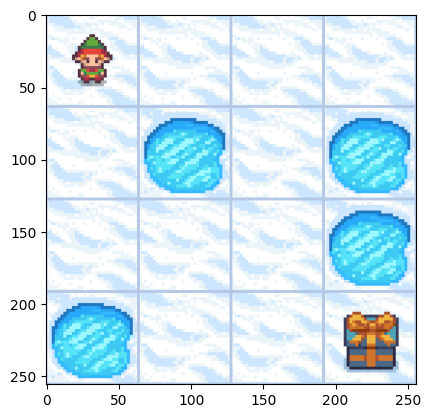

The goal of this game is to go from the starting state (S) to the goal state (G) by walking only on frozen tiles (F) and avoid holes (H). However, the ice is slippery, so it won't always move in the direction it intends (stochastic environment)

In this project, **Q-learning** algorithm is chosen for building RL system. With its ability to handle the stochastic character of the Frozen Lake environment, Q-Learning is an off-policy, value iteration method.

## Step -1: Installing the dependencies on Google Colab

In [ ]:
!pip install numpy
!pip install gym

## Step 2: Importing the dependencies 📚
4 Libraries are used:
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers
- `matplotlib` to plot visualization

In [ ]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

## Step 3: Creating the environment 🎮
It has 16 Discrete Observation space and 4 Discrete Action space

In [ ]:
env = gym.make("FrozenLake-v1")
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Discrete(16)
Action space: Discrete(4)


## Step 4: Creating the Q-table and initializing it 🗄️
- To create the Q-table, action_size and the state_size needs to be calculated.
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [ ]:
action_size = env.action_space.n
state_size = env.observation_space.n

Creating Q table with state_size rows and action_size columns (16x4)

In [ ]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Step 5: Creating the hyperparameters ⚙️


In [ ]:
total_episodes = 20000       # Total episodes
learning_rate = 0.7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

Exploration policy (epsilon-greedy)

In [ ]:
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.005            # Exponential decay rate for exploration prob

## Step 6: Implementation of Q learning algorithm 🧠
  ![alt text](http://simoninithomas.com/drlc/Qlearning//qtable_algo.png)


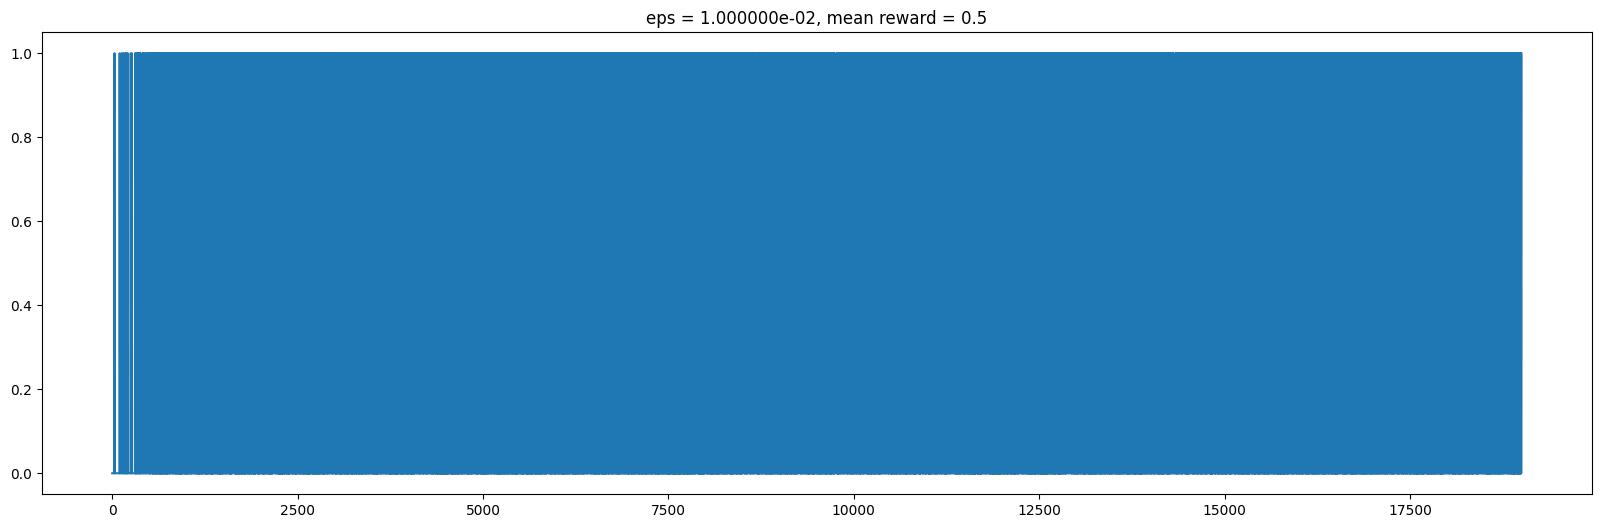

Score over time: 0.50455


In [ ]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            #print("action random", action)


        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # Our new state is state
        state = new_state

        # If done (if we're dead) : finish episode
        if done == True:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)
    if episode % 1000 == 0:
        clear_output(True)
        plt.figure(figsize=(20,6))
        plt.title('eps = {:e}, mean reward = {:.1f}'.format(epsilon, np.mean(rewards)))
        plt.plot(rewards)
        plt.show()


print ("Score over time: " +  str(sum(rewards)/total_episodes))

Updated Q-table

In [ ]:
qtable

array([[1.12078864e-01, 5.79245637e-02, 7.46175827e-02, 4.51169408e-02],
       [3.49890760e-03, 2.07107878e-02, 9.78472041e-03, 1.05223353e-01],
       [1.24490173e-02, 3.18882529e-02, 2.17121787e-02, 3.29749211e-02],
       [2.00226869e-02, 8.86234774e-03, 8.78206996e-03, 3.34280461e-02],
       [1.20924051e-01, 4.95260933e-02, 2.56073773e-02, 1.80437890e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.92945132e-02, 2.57878113e-05, 9.75733676e-04, 7.67192989e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.18731537e-02, 1.13213629e-02, 1.43599849e-02, 1.60240608e-01],
       [2.71228655e-02, 5.23720108e-01, 2.39124522e-02, 1.65977096e-02],
       [1.33876267e-01, 1.06397176e-02, 5.64320044e-03, 4.51517483e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.57195187e-02, 1.26504807e-01, 5.08128071e

## Step 7: Using the updated Q-table to play FrozenLake ! 👾
- After 20,000 episodes, the Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell, it can be observed playing Frozen Lake.
- 15 Episodes are chosen to play Frozen Lake

**Playing Game with animation: Method-1**

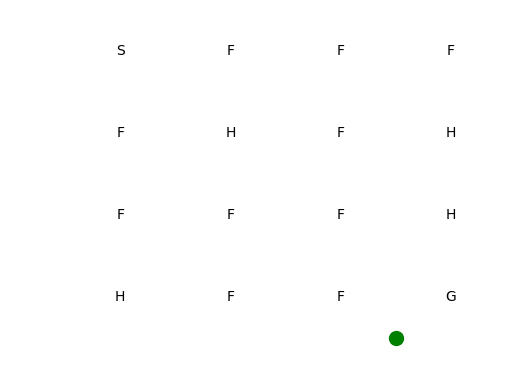

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation

def visualize_frozen_lake(q_table):

    fig, ax = plt.subplots()
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)

    # env = gym.make('FrozenLake-v1', is_slippery=True)
    state = env.reset()

    tiles = {
        'S': 'starting',
        'F': 'frozen',
        'H': 'hole',
        'G': 'goal'
    }

    # For each state, determines its x, y coordinates
    def get_coordinates(state):
        return (state % 4, 3 - state // 4)

    agent, = plt.plot(*get_coordinates(state), 'o', color='red', markersize=10)
    ax.text(0.5, 3.5, 'S', va='center', ha='center')
    ax.text(1.5, 3.5, 'F', va='center', ha='center')
    ax.text(2.5, 3.5, 'F', va='center', ha='center')
    ax.text(3.5, 3.5, 'F', va='center', ha='center')
    ax.text(0.5, 2.5, 'F', va='center', ha='center')
    ax.text(1.5, 2.5, 'H', va='center', ha='center')
    ax.text(2.5, 2.5, 'F', va='center', ha='center')
    ax.text(3.5, 2.5, 'H', va='center', ha='center')
    ax.text(0.5, 1.5, 'F', va='center', ha='center')
    ax.text(1.5, 1.5, 'F', va='center', ha='center')
    ax.text(2.5, 1.5, 'F', va='center', ha='center')
    ax.text(3.5, 1.5, 'H', va='center', ha='center')
    ax.text(0.5, 0.5, 'H', va='center', ha='center')
    ax.text(1.5, 0.5, 'F', va='center', ha='center')
    ax.text(2.5, 0.5, 'F', va='center', ha='center')
    ax.text(3.5, 0.5, 'G', va='center', ha='center')

    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, 4, 1))
    ax.set_yticks(np.arange(-.5, 4, 1))

    def animate(i):
        nonlocal state
        action = np.argmax(q_table[state, :])
        state, _, done, _ = env.step(action)
        agent.set_data(*get_coordinates(state))
        if done:
            if state == 15:  # Goal state
                agent.set_color('green')
            else:  # Hole state
                agent.set_color('blue')
            return agent,
        return agent,

    anim = animation.FuncAnimation(fig, animate, frames=50, interval=500, blit=True)
    plt.axis('off')
    return anim

anim = visualize_frozen_lake(qtable)
from IPython.display import display, HTML
display(HTML(anim.to_jshtml()))

**Playing Game with animation: Method-2**

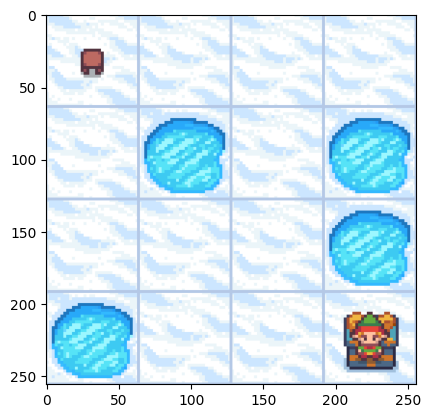

In [ ]:
env.reset()

for episode in range(2):
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):

        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])

        new_state, reward, done, info = env.step(action)
        clear_output(True)

        plt.imshow(env.render('rgb_array'))
        plt.show()

        if done:
            break
        state = new_state
env.close()

In [ ]:
env.reset()

for episode in range(15):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])

        new_state, reward, done, info = env.step(action)

        if done:

            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")

            print("Number of steps", step)

            break
        state = new_state
env.close()

****************************************************
EPISODE  0
We reached our Goal 🏆
Number of steps 30
****************************************************
EPISODE  1
We reached our Goal 🏆
Number of steps 36
****************************************************
EPISODE  2
We reached our Goal 🏆
Number of steps 83
****************************************************
EPISODE  3
We reached our Goal 🏆
Number of steps 8
****************************************************
EPISODE  4
We reached our Goal 🏆
Number of steps 97
****************************************************
EPISODE  5
****************************************************
EPISODE  6
We reached our Goal 🏆
Number of steps 13
****************************************************
EPISODE  7
We reached our Goal 🏆
Number of steps 28
****************************************************
EPISODE  8
We reached our Goal 🏆
Number of steps 78
****************************************************
EPISODE  9
We reached our Goal 🏆
Number of s

#Parameter Study

Learning rate (α) is chosen for parameter study. The learning rate determines how much the Q-value update impacts the current Q-value.

Four values for learning_rate is chosen for parameter study: [0.001, 0.01, 0.1, 0.5]

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 0.5]

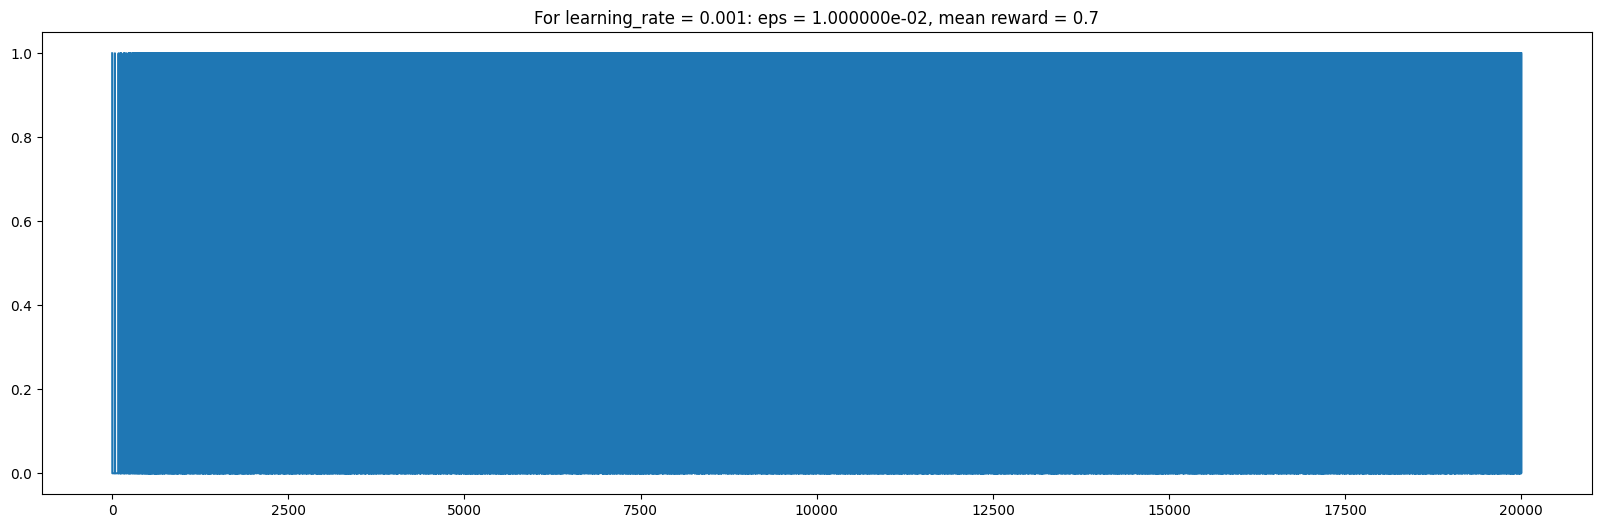

Score over time for learning_rate = 0.001: 0.67445


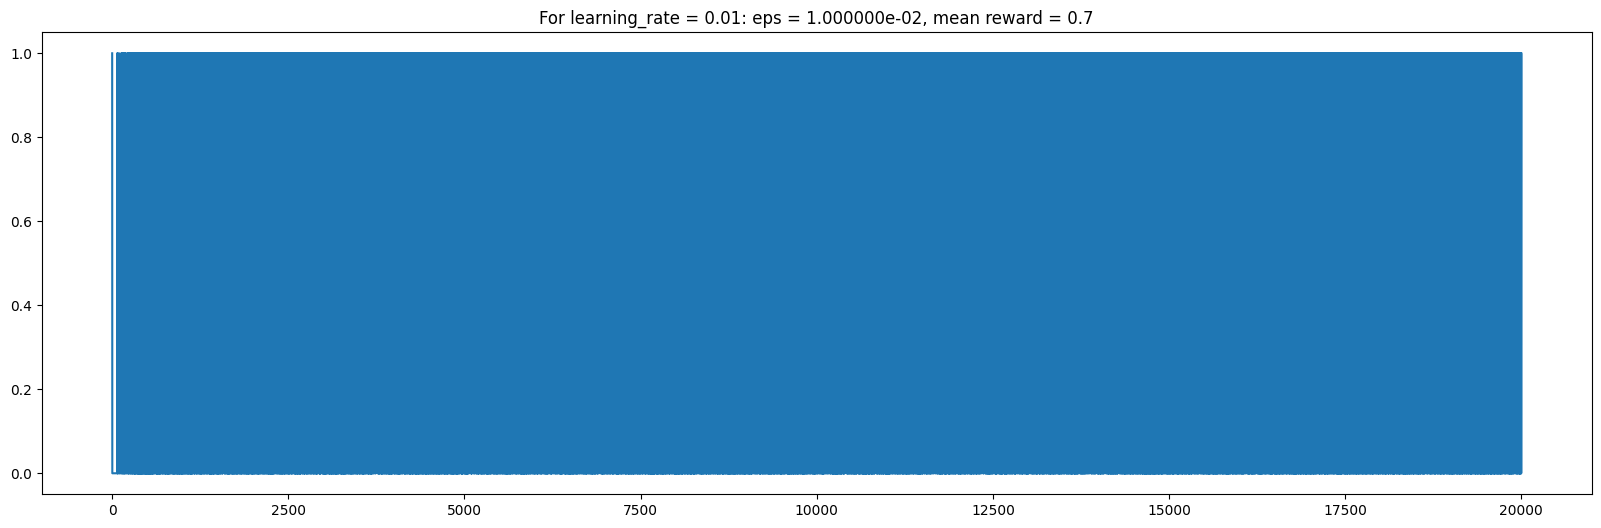

Score over time for learning_rate = 0.01: 0.67365


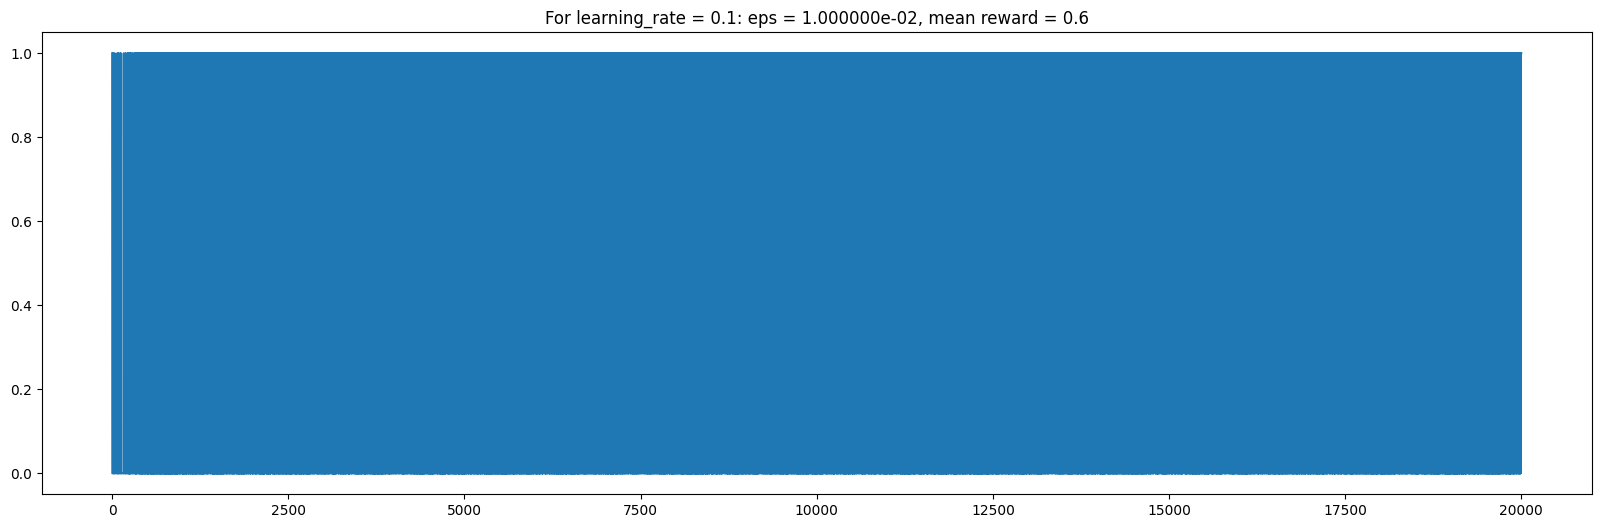

Score over time for learning_rate = 0.1: 0.6094


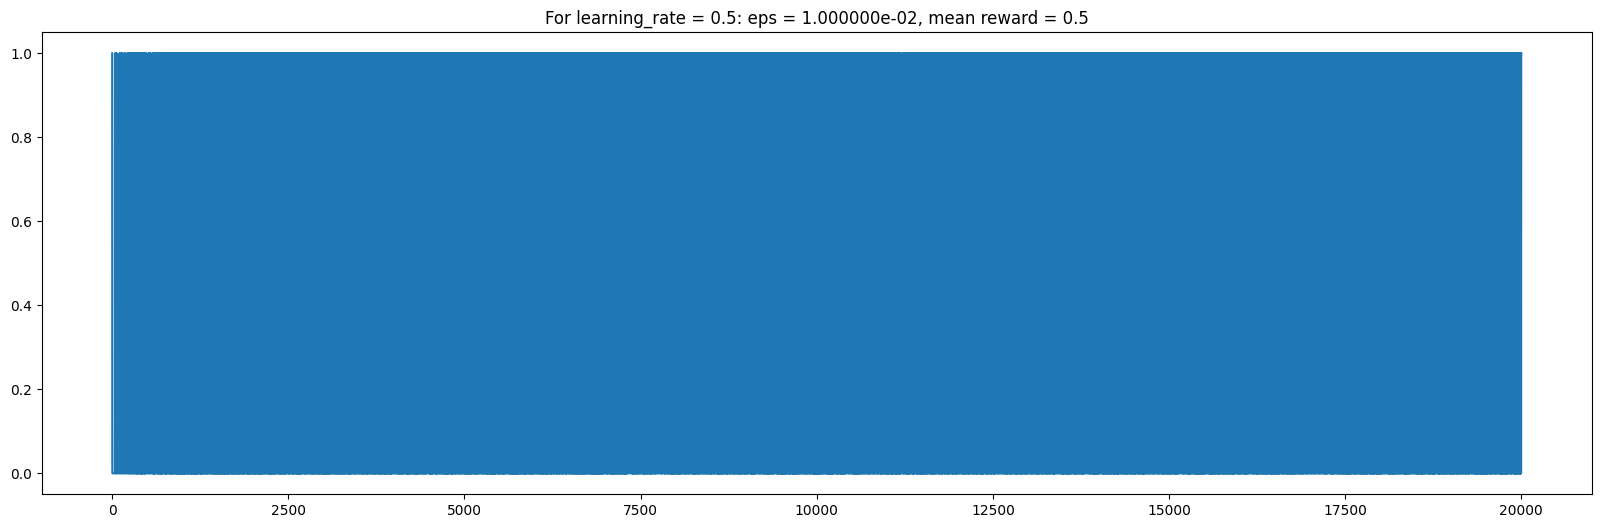

Score over time for learning_rate = 0.5: 0.51215


In [ ]:
for learning_rate in learning_rates:
  rewards = []

  # 2 For life or until learning is stopped
  for episode in range(total_episodes):
      # Reset the environment
      state = env.reset()
      step = 0
      done = False
      total_rewards = 0

      for step in range(max_steps):
          # 3. Choose an action a in the current world state (s)
          ## First we randomize a number
          exp_exp_tradeoff = random.uniform(0, 1)

          ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
          if exp_exp_tradeoff > epsilon:
              action = np.argmax(qtable[state,:])
              #print(exp_exp_tradeoff, "action", action)

          # Else doing a random choice --> exploration
          else:
              action = env.action_space.sample()
              #print("action random", action)


          # Take the action (a) and observe the outcome state(s') and reward (r)
          new_state, reward, done, info = env.step(action)

          # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
          # qtable[new_state,:] : all the actions we can take from new state
          qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

          total_rewards += reward

          # Our new state is state
          state = new_state

          # If done (if we're dead) : finish episode
          if done == True:
              break

      # Reduce epsilon (because we need less and less exploration)
      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
      rewards.append(total_rewards)
      if episode == 19999:
          plt.figure(figsize=(20,6))
          plt.title('For learning_rate = {}: eps = {:e}, mean reward = {:.1f}'.format(learning_rate, epsilon, np.mean(rewards)))
          plt.plot(rewards)
          plt.show()


  print ("Score over time for learning_rate = " + str(learning_rate) + ": " +  str(sum(rewards)/total_episodes))